In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

{('Z', 'X'): Text(0.5, 0.0, 'beta'),
 ('Q', 'X'): Text(1.25, 0.5, 'gam'),
 ('Q', 'Y'): Text(1.75, 0.5, 'eta'),
 ('X', 'Y'): Text(1.5, 0.0, 'alpha')}

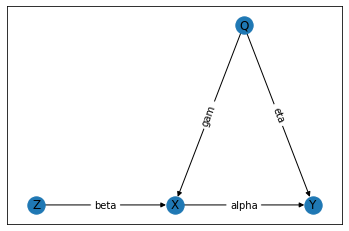

In [2]:
import networkx as nx

G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_nodes_from(['Z', 'X', 'Q', 'Y'])
G.add_edges_from([('Z', 'X'), ('Q', 'X'), ('Q', 'Y'), ('X', 'Y')])
pos = {'Z': [0, 0], 'X': [1, 0], 'Y': [2, 0], 'Q': [1.5, 1]}

edge_labels = {('Z', 'X'): 'beta', 
               ('Q', 'X'): 'gam', 
               ('Q', 'Y'): 'eta', 
               ('X', 'Y'): 'alpha'}
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

In [3]:
state = np.random.RandomState(0)

k = 3    # number of latent dimensions
n = 200  # number of samples
d = 100  # number of microbes
m = 20   # number of instruments
c = 3    # number of confounders

# mediators
Z = state.normal(0, 5, (n, m))
# betaU = state.normal(0, 1, (m, k))
from scipy.stats import ortho_group
betaU = ortho_group.rvs(m)[:,range(k)]
# betaU[np.abs(betaU) < np.quantile(np.abs(betaU), 0.6)] = 0
# betaV = state.normal(0, 1, (k, d))
betaV = ortho_group.rvs(d)[:,range(k)]
betaV = betaV.transpose()
# betaV[np.abs(betaV) < np.quantile(np.abs(betaV), 0.8)] = 0
beta = betaU @ betaV
U = Z @ betaU

# confounder
Q = state.normal(0, 3, (n, c))
gam = state.normal(0, 1, (c, d))
eta = state.normal(0, 1, (c, 1))

# outcomes
alpha = state.normal(0, 1, (k, 1))

# noise
eps = state.normal(0, 1, (n, d))
delta = state.normal(0, 1, (n, 1))

# structural equation models
X = Z @ beta + Q @ gam + eps
Y = U @ alpha + Q @ eta + delta

# betaU 

# betaV

# Simulation 1 : Test the importance of including instrumental variables 

In [4]:
np.savetxt('sim_data/Q.csv', Q, delimiter=',')
np.savetxt('sim_data/Z.csv', Z, delimiter=',')
np.savetxt('sim_data/X.csv', X, delimiter=',')
np.savetxt('sim_data/Y.csv', Y, delimiter=',')
np.savetxt('sim_data/beta.csv', beta, delimiter=',')
np.savetxt('sim_data/betaU.csv', betaU, delimiter=',')
np.savetxt('sim_data/betaV.csv', betaV, delimiter=',')
np.savetxt('sim_data/alpha.csv', alpha, delimiter=',')
np.savetxt('sim_data/gam.csv', gam, delimiter=',')
np.savetxt('sim_data/eta.csv', eta, delimiter=',')

# Simulation 2 : Test the importance of measuring multiple omics to satisfy the instrumental variables assumption

In [5]:
X1 = X[:, :50]
X2 = X[:, 50:]
np.savetxt('sim_data/X1.csv', X1, delimiter=',')
np.savetxt('sim_data/X2.csv', X2, delimiter=',')